# 3. Deep Image Classification

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
import keras.backend

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(10)

/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load data
NUM_TRAIN = 2000
NUM_VALID = 1000

(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()
y2label = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

X_train = X_train[:NUM_TRAIN]
y_train = y_train[:NUM_TRAIN]
X_valid = X_valid[:NUM_VALID]
y_valid = y_valid[:NUM_VALID]

print(X_train[0])
print(X_train.shape)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(2000, 32, 32, 3)


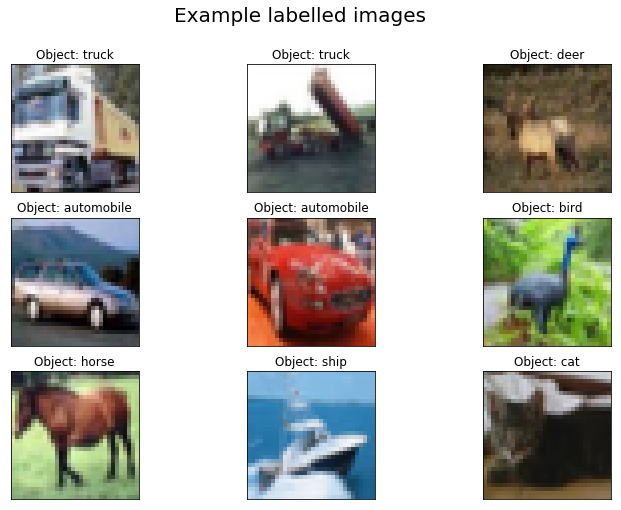

In [3]:
# visualize first few labelled images
cols = 3
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))
plt.suptitle("Example labelled images", fontsize=20)

image_num = 0
for row in range(rows): 
    for col in range(cols):
        image_num += 1
        ax[row][col].imshow(X_train[image_num], cmap='gray')
        ax[row][col].set_title("Object: %s" % y2label[y_train[image_num][0]])
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
plt.show()

### Try classification with standard neural network (from previous notebook)

In [4]:
# convert images to grayscale
X_train_gray = X_train[:,:,:,0]*299/1000 + X_train[:,:,:,1]*587/1000 + X_train[:,:,:,2]*114/1000
X_valid_gray = X_valid[:,:,:,0]*299/1000 + X_valid[:,:,:,1]*587/1000 + X_valid[:,:,:,2]*114/1000

# preprocess images (make flat)
num_pixels = X_train_gray.shape[1] * X_train_gray.shape[2]
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], num_pixels).astype('float32')
X_valid_gray = X_valid_gray.reshape(X_valid_gray.shape[0], num_pixels).astype('float32')

# preprocess labels (make categorical)
y_train_categorical = np_utils.to_categorical(y_train)
y_valid_categorical = np_utils.to_categorical(y_valid)
num_classes = y_valid_categorical.shape[1]

In [5]:
# create and train model

model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(X_train_gray, y_train_categorical, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
2000/2000 [==============================] - 10s 5ms/step - loss: 14.3994 - acc: 0.1065
Epoch 2/10
2000/2000 [==============================] - 9s 5ms/step - loss: 14.3935 - acc: 0.1070
Epoch 3/10
2000/2000 [==============================] - 9s 5ms/step - loss: 14.3935 - acc: 0.1070
Epoch 4/10
2000/2000 [==============================] - 9s 5ms/step - loss: 14.3935 - acc: 0.1070
Epoch 5/10
2000/2000 [==============================] - 9s 5ms/step - loss: 14.3935 - acc: 0.1070
Epoch 6/10
2000/2000 [==============================] - 10s 5ms/step - loss: 14.3935 - acc: 0.1070
Epoch 7/10
2000/2000 [==============================] - 10s 5ms/step - loss: 14.3935 - acc: 0.1070
Epoch 8/10
2000/2000 [==============================] - 10s 5ms/step - loss: 14.3935 - acc: 0.1070
Epoch 9/10
2000/2000 [==============================] - 11s 6ms/step - loss: 14.3935 - acc: 0.1070
Epoch 10/10
2000/2000 [==============================] - 11s 5ms/step - loss: 14.3935 - acc: 0.1070


In [6]:
# evaluate model
scores = model.evaluate(X_valid_gray, y_valid_categorical, verbose=0)
print('Valid accuracy: {}%'.format(scores[1]*100))

Test accuracy: 9.0%


In [7]:
# example of a Convolutional Neural Network (CNN)
cnn = Sequential()

cnn.add(
    Conv2D(
            filters=32, 
            kernel_size=(5, 5), 
            strides=(1, 1),
            activation='relu',
            input_shape=(32, 32, 3)
    )
)

cnn.add(MaxPooling2D(pool_size=(2, 2), 
                     strides=(2, 2)))

cnn.add(Conv2D(64, (5, 5), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(1000, activation='relu'))
cnn.add(Dense(2, activation='softmax'))

Convolutional neural network prediction:
<img src="images/CNN.png" width=700/>
(may not display on Github)

### Build a deep convolutional neural network for `cifar10` image classification

In [9]:
# re-load data
NUM_TRAIN = 10000
NUM_VALID = 1000

(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()

X_train = X_train[:NUM_TRAIN]
y_train = y_train[:NUM_TRAIN]
X_valid = X_valid[:NUM_VALID]
y_valid = y_valid[:NUM_VALID]

# re-preprocess images and labels
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_train /= 255
X_valid /= 255
y_train_categorical = np_utils.to_categorical(y_train)
y_valid_categorical = np_utils.to_categorical(y_valid)
num_classes = y_valid_categorical.shape[1]

# create model
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# TODO: add a convolutional layer: 128 neurons, 3x3 filter
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
# TODO: add a max pooling layer: 2x2 pooling square
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

sgd_optimzer = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd_optimzer, metrics=['accuracy'])

In [10]:
# model persistence
SKIP_TRAINING = True

if not SKIP_TRAINING:
    # train model
    model.fit(X_train, y_train_categorical, epochs=20, batch_size=64, verbose=1)
    
    # save model weights
    model.save("cnn_weights.h5")
    already_trained = True
    
else:
    # load model weights
    model.load_weights("cnn_weights.h5")

In [11]:
# evaluate model
scores = model.evaluate(X_valid, y_valid_categorical, verbose=0)
print('Validation accuracy: {}%'.format(scores[1]*100))

Validation accuracy: 63.8%


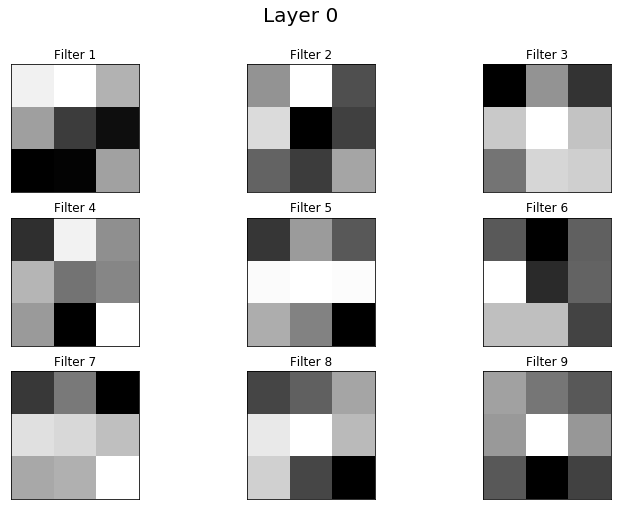

In [12]:
# visualize first 9 trained filters in a given layer
CHOOSE_LAYER = 0

layer_weights_2d = model.layers[CHOOSE_LAYER].get_weights()[0][:,:,0,:]

cols = 3
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))
fig.suptitle("Layer %i" % CHOOSE_LAYER, fontsize=20)

filter_num = 0
for row in range(rows): 
    for col in range(cols):
        ax[row][col].imshow(layer_weights_2d[:,:,filter_num],cmap="gray")
        ax[row][col].set_title("Filter %i" % (filter_num+1), fontsize=12)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        filter_num += 1

plt.show()

### For an input image, visualize the first 9 filter activations in a given hiden layer

In [18]:
from keras import backend

CHOOSE_LAYER = 0
CHOOSE_IMAGE = 9

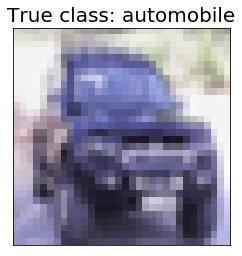

In [19]:
# visualize image
example_image = X_valid[CHOOSE_IMAGE]

fig = plt.figure()
plt.imshow(example_image)
plt.title("True class: %s" % y2label[y_valid[CHOOSE_IMAGE][0]], fontsize=20)
plt.yticks([])
plt.xticks([])

plt.show()

In [20]:
# compute feature maps for image in given hidden layer
layer_fxn = backend.function(inputs=[model.input] + [backend.learning_phase()], 
                             outputs=[model.layers[CHOOSE_LAYER].output])
layer_outputs = layer_fxn([example_image.reshape(1,32,32,3), 1])
layer_activations = layer_outputs[0]

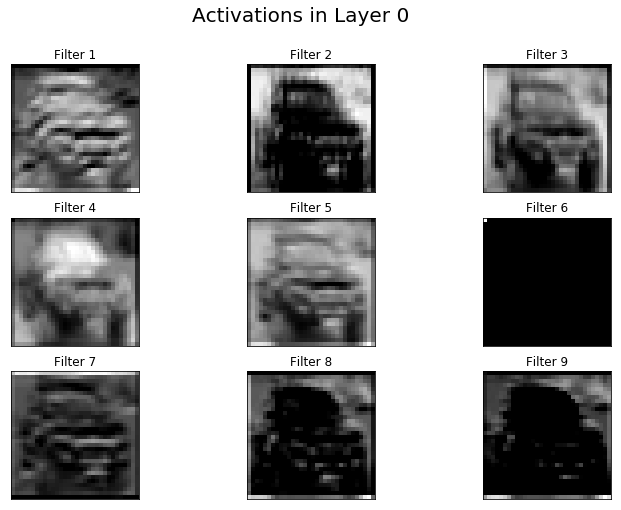

In [21]:
# visualize feature maps
cols = 3
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(12,8))
plt.suptitle("Activations in Layer %i" % CHOOSE_LAYER, fontsize=20)
filter_num = 0
for row in range(0, rows): 
    for col in range(0, cols):
        ax[row][col].imshow(layer_activations[0, :, :, filter_num], cmap='gray')
        ax[row][col].set_title("Filter %i" % (filter_num+1), fontsize=12)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        filter_num += 1

plt.show()

In [22]:
# TODO: run prediction on example image
y_predicted = model.predict_classes(example_image.reshape(1, 32, 32, 3))[0]
print("Predicted class:{}".format(y2label[y_predicted]))

Predicted class:automobile


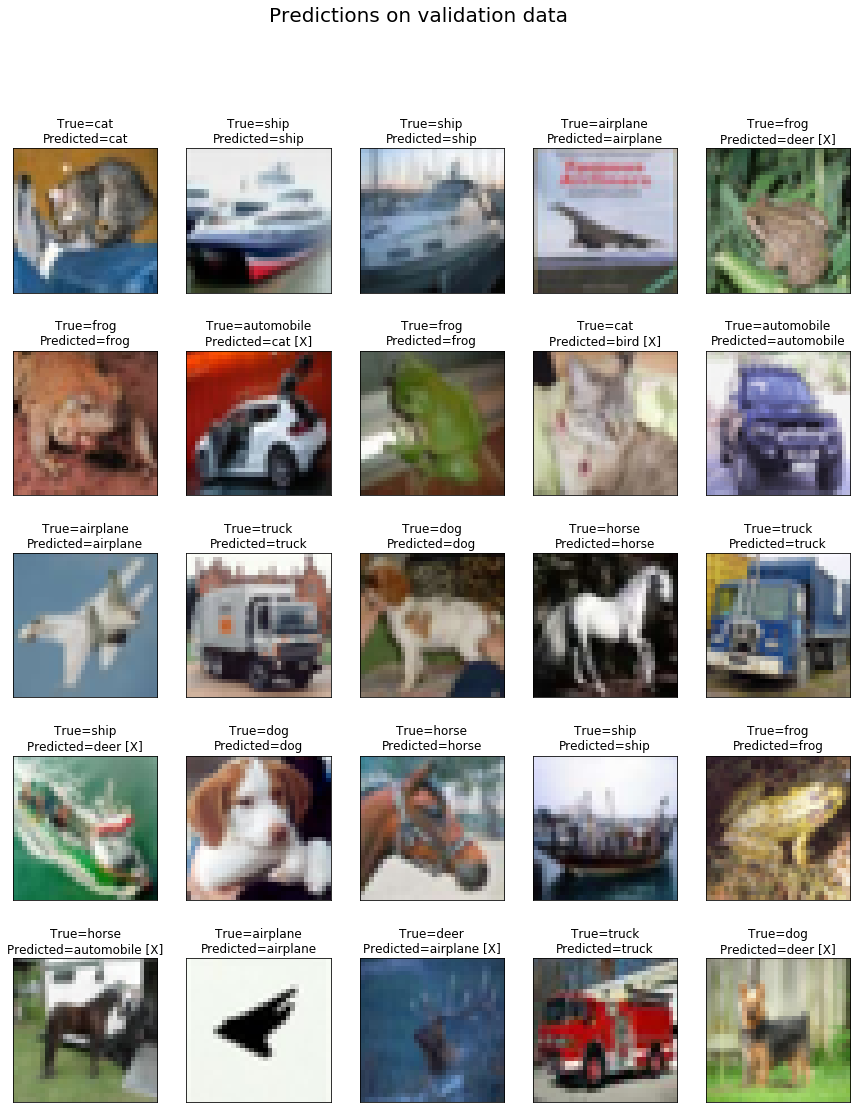

In [23]:
# visualize a few predictions on validation set
cols = 5
rows = 5
fig, ax = plt.subplots(rows, cols, figsize=(15, 18))
fig.suptitle("Predictions on validation data", fontsize=20)

image_num = 0
for row in range(0, rows): 
    for col in range(0, cols):
        y_true = y2label[y_valid[image_num][0]]
        y_predicted = y2label[model.predict_classes(X_valid[image_num].reshape(1,32,32,3))[0]]
        ax[row][col].imshow(X_valid[image_num])
        title = "True=%s\nPredicted=%s" % (y_true, y_predicted)
        if y_true != y_predicted:
            title += " [X]"
        ax[row][col].set_title(title)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        image_num += 1

plt.show()

# Exercise: prediction on test data (challenge)

We are going to ask our CNN model to classify images it has never seen before from an entirely different source:

1. Download an example color image of each of the classes in `cifar10`. 
2. Use an image editor or code in Python (via `numpy`) to downsize these images to be 32 x 32 x 3. 
3. Feed each into the model you've created above for prediction via `predict_classes`.
4. Evaluate how your model does.
5. Diagnose your model by checking the first and last layer of activated feature maps for each image. Do the feature maps make sense?

Based on how your model does, retrain your CNN to improve the **training**, **validation** and **test** accuracies. Experiment with different parameters:

* Consider training on the *entire* `cifar10` dataset.
* Increase the number of epochs.
* Increase the training batch size.
* Decrease the learning rate.